In [1]:
# Libraries applied

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as XGB

import missingno as msno
from sklearn.metrics import roc_auc_score, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset

train = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('test.csv', index_col='id')

In [3]:
df = pd.concat([train.drop(columns = ['target']), test])
df

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,...,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,...,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,...,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,...,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,...,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,1.0,T,N,Red,Trapezoid,Axolotl,Costa Rica,Theremin,...,c1a4acfaf,45a68dd2e,2.0,Expert,Warm,n,R,dp,2.0,12.0
999996,0.0,0.0,0.0,F,N,Red,Polygon,Dog,Russia,Theremin,...,220190c9e,e48348d66,1.0,Contributor,NaN,n,X,US,1.0,5.0
999997,0.0,0.0,1.0,T,N,Red,Triangle,Hamster,NaN,Theremin,...,cc5495ab3,47021df0d,1.0,Grandmaster,Boiling Hot,m,P,TL,1.0,6.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   bin_0   970205 non-null  float64
 1   bin_1   969959 non-null  float64
 2   bin_2   970098 non-null  float64
 3   bin_3   970035 non-null  object 
 4   bin_4   970002 non-null  object 
 5   nom_0   969686 non-null  object 
 6   nom_1   969897 non-null  object 
 7   nom_2   969786 non-null  object 
 8   nom_3   969703 non-null  object 
 9   nom_4   969972 non-null  object 
 10  nom_5   970310 non-null  object 
 11  nom_6   969857 non-null  object 
 12  nom_7   969994 non-null  object 
 13  nom_8   970289 non-null  object 
 14  nom_9   969867 non-null  object 
 15  ord_0   969819 non-null  float64
 16  ord_1   969792 non-null  object 
 17  ord_2   969820 non-null  object 
 18  ord_3   970031 non-null  object 
 19  ord_4   970137 non-null  object 
 20  ord_5   970240 non-null  object 
 21  day     9

In [5]:
df.isna().sum()

bin_0    29795
bin_1    30041
bin_2    29902
bin_3    29965
bin_4    29998
nom_0    30314
nom_1    30103
nom_2    30214
nom_3    30297
nom_4    30028
nom_5    29690
nom_6    30143
nom_7    30006
nom_8    29711
nom_9    30133
ord_0    30181
ord_1    30208
ord_2    30180
ord_3    29969
ord_4    29863
ord_5    29760
day      29977
month    29972
dtype: int64

<AxesSubplot:ylabel='id'>

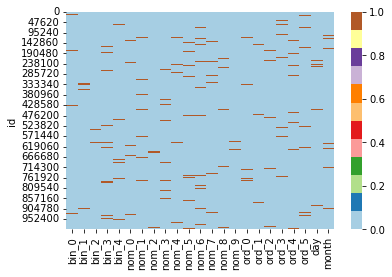

In [6]:
# A quick look at null values

sns.heatmap(df.isna(), cmap='Paired')

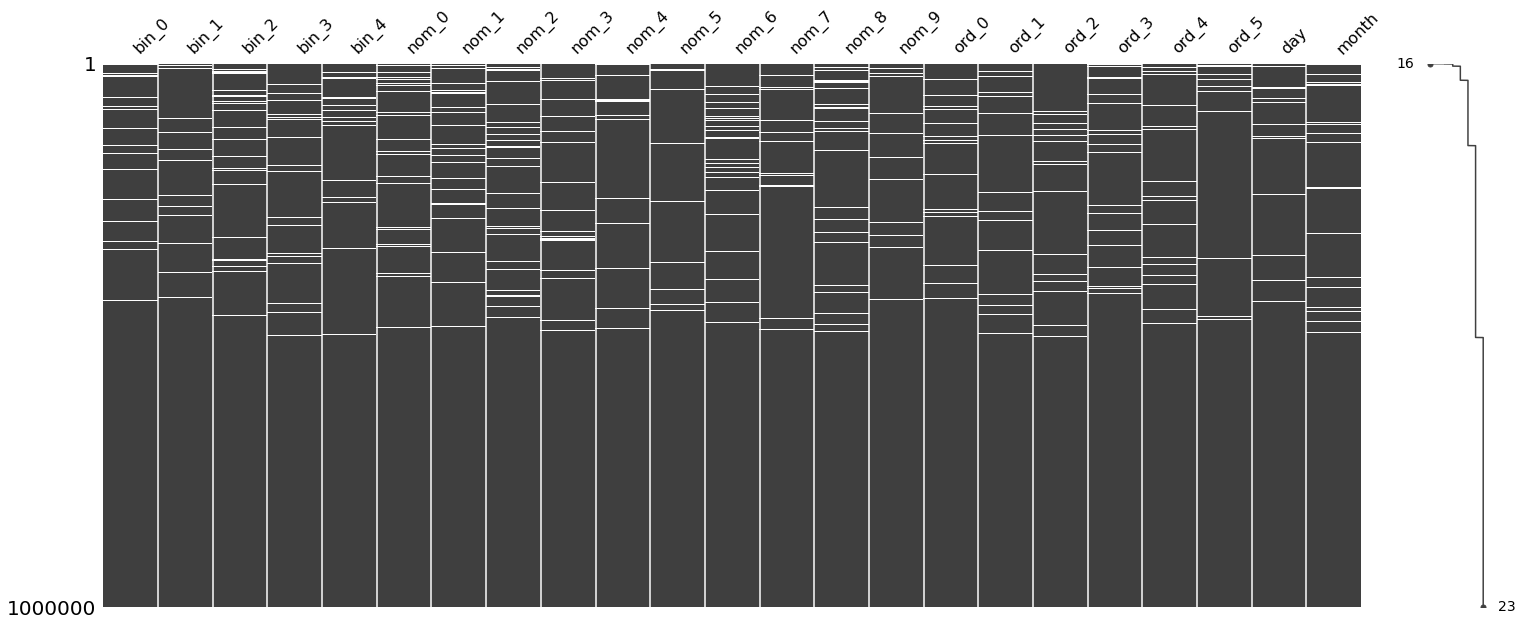

In [7]:
# Another option

msno.matrix(df,sort='ascending')
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

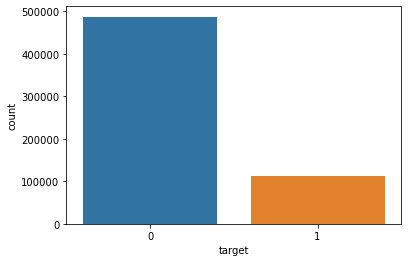

In [8]:
# Target proportion

sns.countplot(train['target'])

In [9]:
# Correlation work (everything OK)
corr = df.corr()
corr

,bin_0,bin_1,bin_2,ord_0,day,month
bin_0,1.000000,-0.001614,0.001892,-0.001973,-0.000319,0.001182
bin_1,-0.001614,1.000000,0.001367,-0.000162,0.000984,0.002223
bin_2,0.001892,0.001367,1.000000,0.000019,0.000173,-0.001893
ord_0,-0.001973,-0.000162,0.000019,1.000000,-0.001765,-0.001962
day,-0.000319,0.000984,0.000173,-0.001765,1.000000,0.000866
month,0.001182,0.002223,-0.001893,-0.001962,0.000866,1.000000


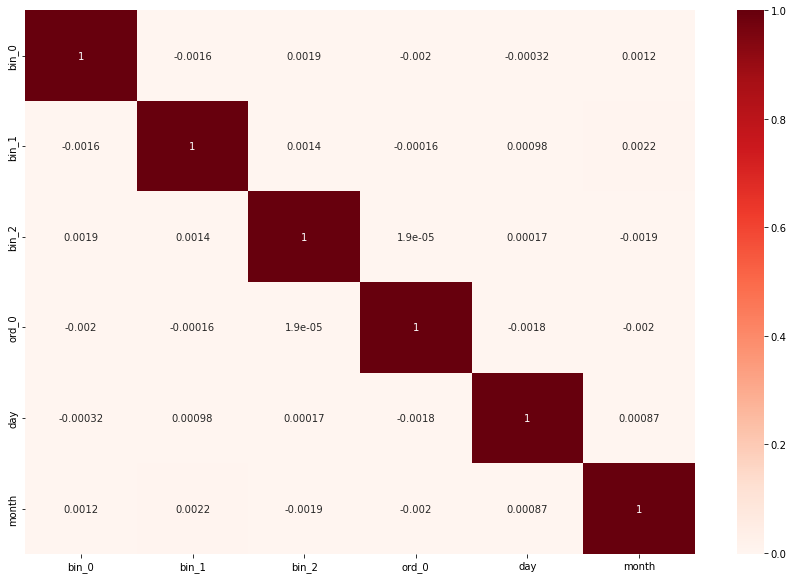

In [10]:
# Let's see a plot of corr

f, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr, annot=True, cmap='Reds', ax=ax)

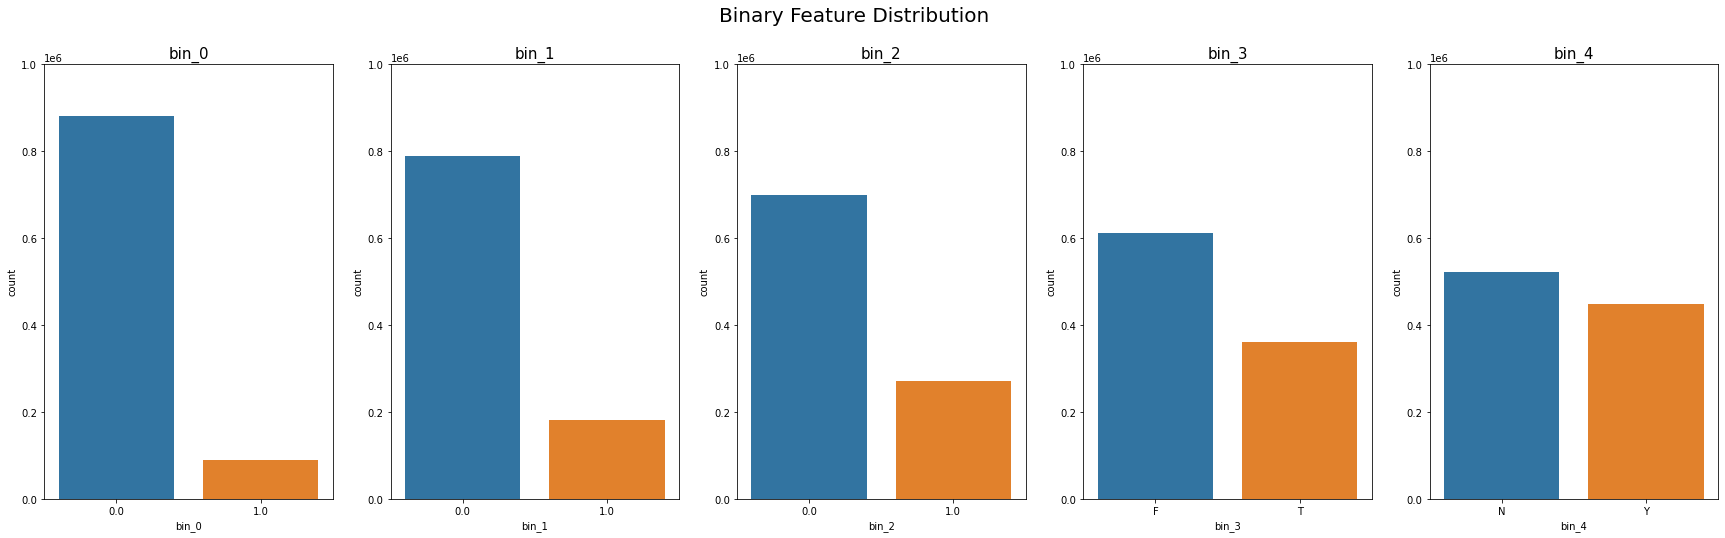

In [11]:
# Binary Features

fig, ax = plt.subplots(1,5, figsize=(30, 8))
for i in range(5): 
    sns.countplot(f'bin_{i}', data=df, ax=ax[i])
    ax[i].set_ylim([0, 1000000])
    ax[i].set_title(f'bin_{i}', fontsize=15)
fig.suptitle("Binary Feature Distribution", fontsize=20)
plt.show()

In [12]:
# Filling Values: Binary

df['bin_0'].fillna(df['bin_0'].mode().iloc[0], inplace=True)
df['bin_1'].fillna(df['bin_1'].mode().iloc[0], inplace=True)
df['bin_2'].fillna(df['bin_2'].mode().iloc[0], inplace=True)
df['bin_3'].fillna(df['bin_3'].mode().iloc[0], inplace=True)
df['bin_4'].fillna(df['bin_4'].mode().iloc[0], inplace=True)

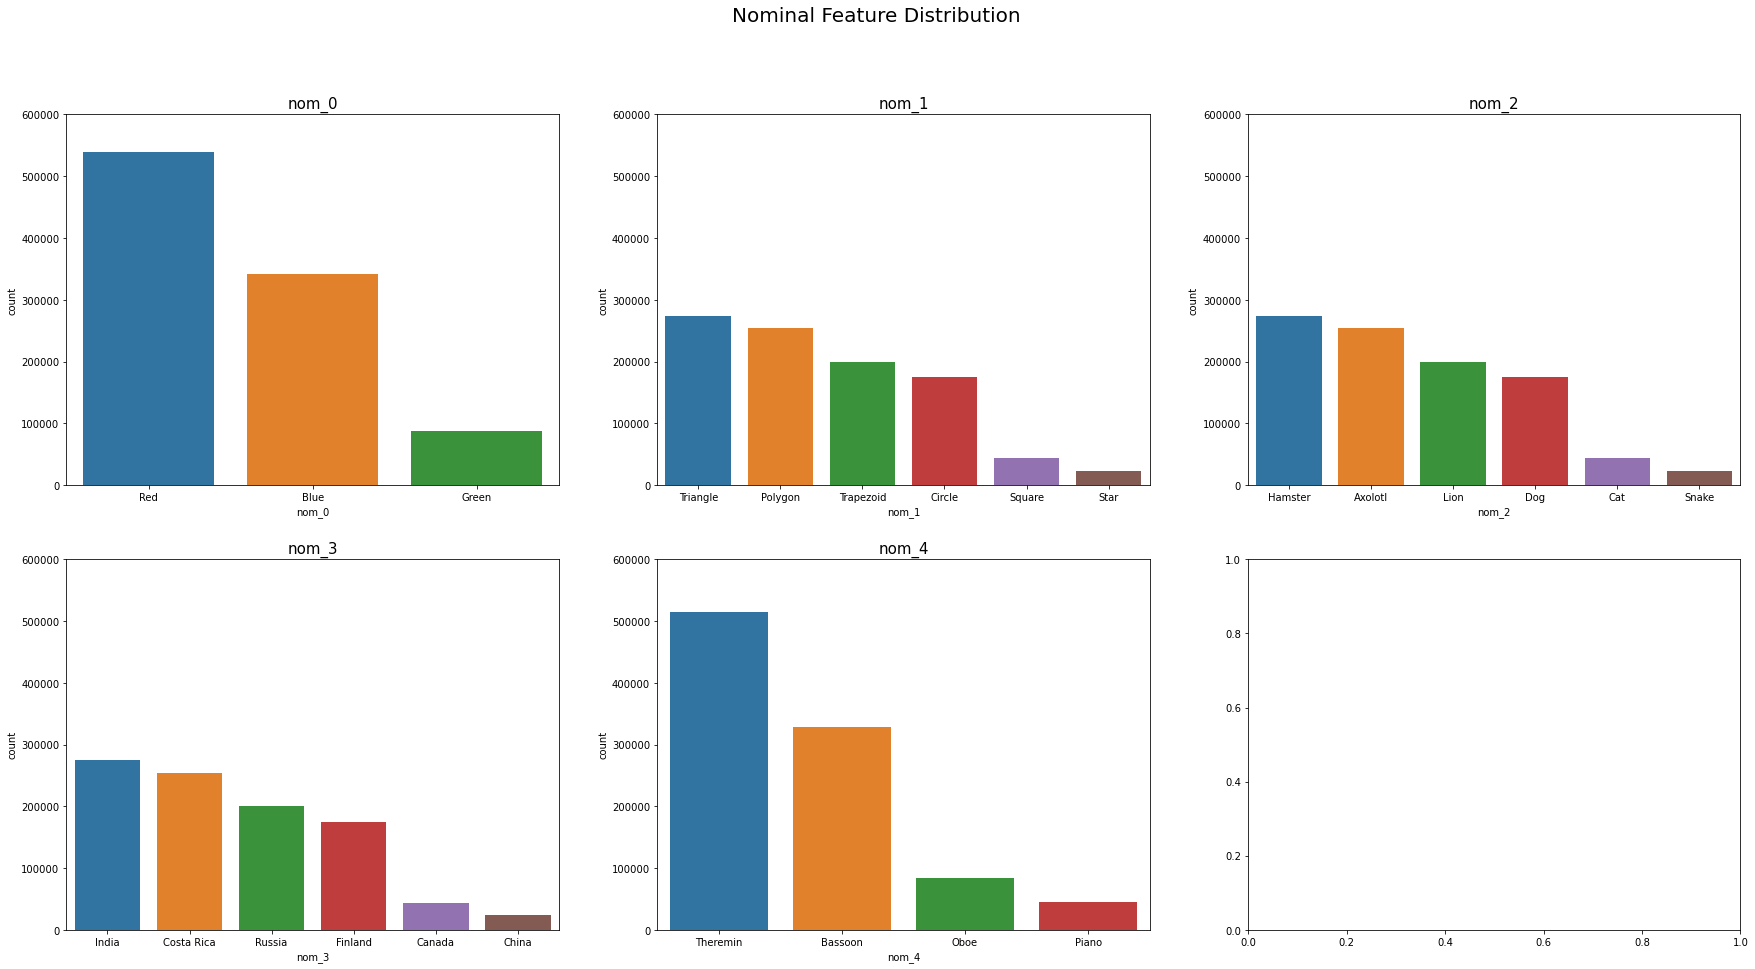

In [13]:
# Nominal Features

fig, ax = plt.subplots(2,3, figsize=(30, 15))
for i in range(5): 
    sns.countplot(f'nom_{i}', data= df, ax=ax[i//3][i%3],
                 order=train[f'nom_{i}'].value_counts().index)
    ax[i//3][i%3].set_ylim([0, 600000])
    ax[i//3][i%3].set_title(f'nom_{i}', fontsize=15)
fig.suptitle("Nominal Feature Distribution", fontsize=20)
plt.show()

In [14]:
# Filling Values: Nominal

df['nom_0'].fillna(df['nom_0'].mode().iloc[0], inplace=True)
df['nom_1'].fillna(df['nom_1'].mode().iloc[0], inplace=True)
df['nom_2'].fillna(df['nom_2'].mode().iloc[0], inplace=True)
df['nom_3'].fillna(df['nom_3'].mode().iloc[0], inplace=True)
df['nom_4'].fillna(df['nom_4'].mode().iloc[0], inplace=True)
df['nom_5'].fillna(df['nom_5'].mode().iloc[0], inplace=True)
df['nom_6'].fillna(df['nom_6'].mode().iloc[0], inplace=True)
df['nom_7'].fillna(df['nom_7'].mode().iloc[0], inplace=True)
df['nom_8'].fillna(df['nom_8'].mode().iloc[0], inplace=True)
df['nom_9'].fillna(df['nom_9'].mode().iloc[0], inplace=True)

In [15]:
# Ordinal Features

train[[f'ord_{i}' for i in range(6)]].describe(include='all')

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
count,581712.000000,581959,581925,582084,582070,582287
unique,NaN,5,6,15,26,190
top,NaN,Novice,Freezing,n,N,Fl
freq,NaN,160597,142726,70982,39978,10562
mean,1.948224,NaN,NaN,NaN,NaN,NaN
std,0.853904,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,NaN,NaN,NaN,NaN
50%,2.000000,NaN,NaN,NaN,NaN,NaN
75%,3.000000,NaN,NaN,NaN,NaN,NaN


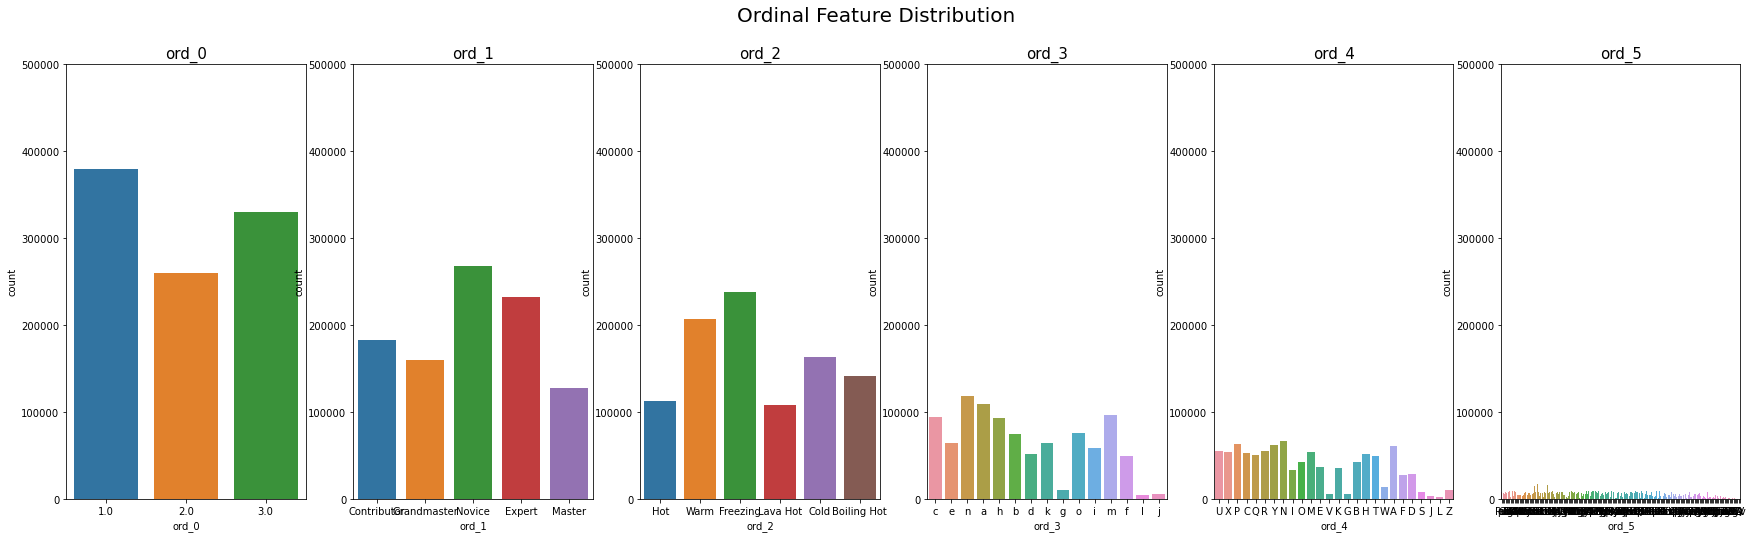

In [16]:
# ord_3~4 with high cardinality

fig, ax = plt.subplots(1,6, figsize=(30, 8))

for i in range(6): 
    sns.countplot(f'ord_{i}', data= df, ax=ax[i])
    ax[i].set_ylim([0, 500000])
    ax[i].set_title(f'ord_{i}', fontsize=15)
fig.suptitle("Ordinal Feature Distribution", fontsize=20)
plt.show()

In [17]:
# Filling Values: Ordinal

df['ord_0'].fillna(df['ord_0'].mode().iloc[0], inplace=True)
df['ord_1'].fillna(df['ord_1'].mode().iloc[0], inplace=True)
df['ord_2'].fillna(df['ord_2'].mode().iloc[0], inplace=True)
df['ord_3'].fillna(df['ord_3'].mode().iloc[0], inplace=True)
df['ord_4'].fillna(df['ord_4'].mode().iloc[0], inplace=True)
df['ord_4'].fillna(df['ord_4'].mode().iloc[0], inplace=True)
df['ord_5'].fillna(df['ord_5'].mode().iloc[0], inplace=True)

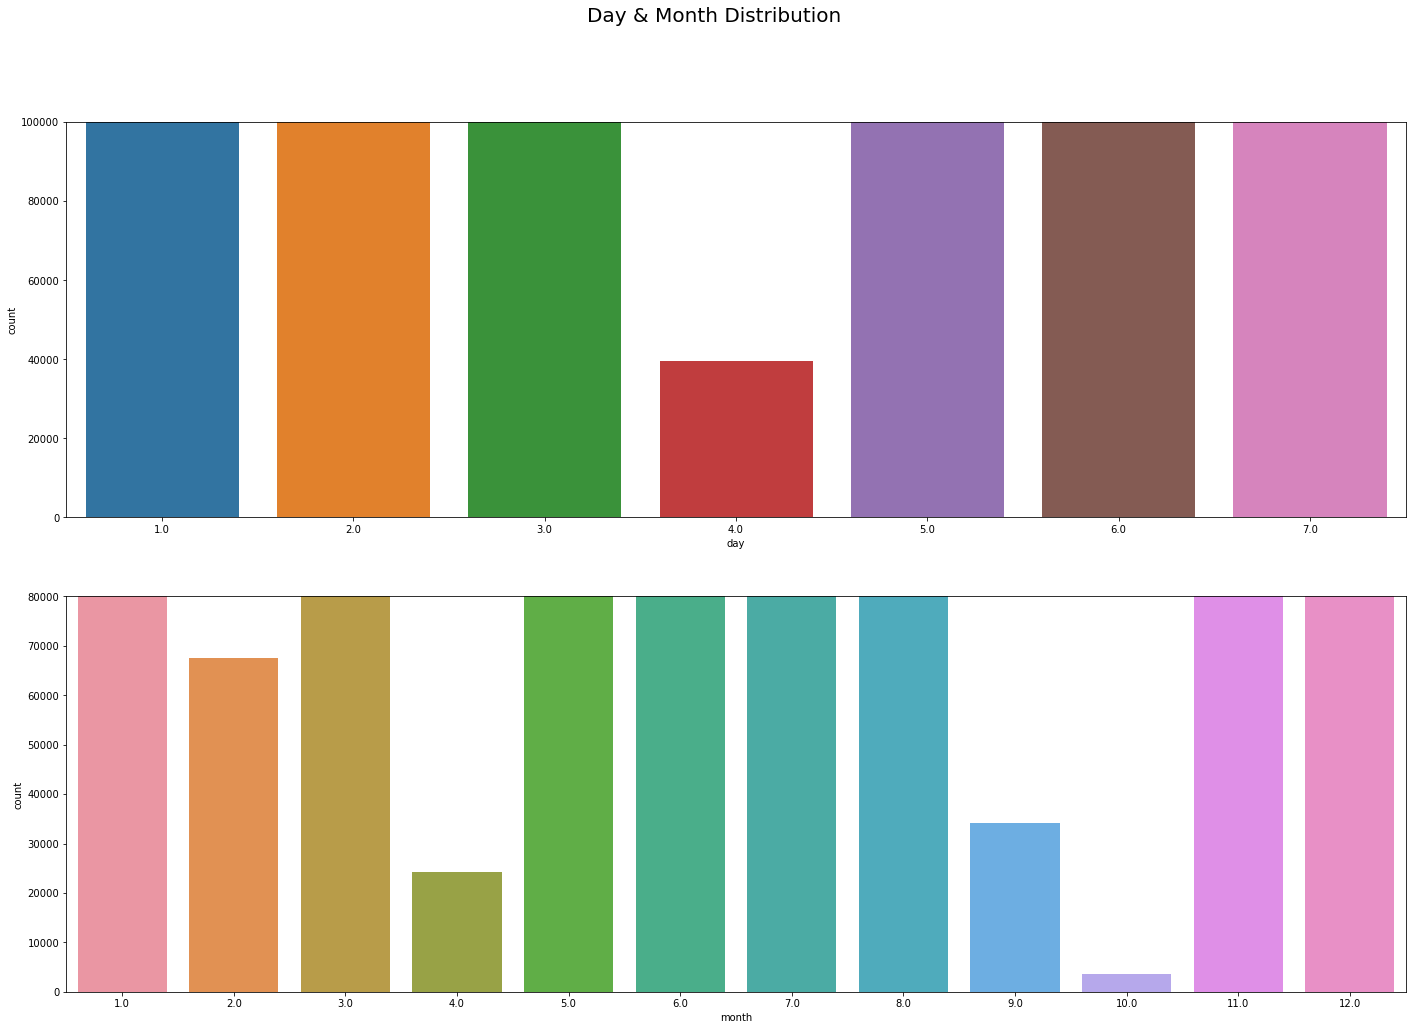

In [18]:
# Day e Month Features

fig, ax = plt.subplots(2,1, figsize=(24, 16))

sns.countplot('day', data=df, ax=ax[0])
ax[0].set_ylim([0, 100000])

sns.countplot('month', data=df, ax=ax[1])
ax[1].set_ylim([0, 80000])

fig.suptitle("Day & Month Distribution", fontsize=20)
plt.show()

In [19]:
# Filling Values: Day e Month

df['day'].fillna(df['day'].mode().iloc[0], inplace=True)
df['month'].fillna(df['month'].mode().iloc[0], inplace=True)

In [20]:
# I've tried to be very explanatory with encoding. A better way to do, as example of binary features, is:
# bin_encoding = {'F':0, 'T':1, 'N':0, 'Y':1}
# df['bin_3'] = df['bin_3'].map(bin_encoding)
# df['bin_4'] = df['bin_4'].map(bin_encoding)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   bin_0   1000000 non-null  float64
 1   bin_1   1000000 non-null  float64
 2   bin_2   1000000 non-null  float64
 3   bin_3   1000000 non-null  object 
 4   bin_4   1000000 non-null  object 
 5   nom_0   1000000 non-null  object 
 6   nom_1   1000000 non-null  object 
 7   nom_2   1000000 non-null  object 
 8   nom_3   1000000 non-null  object 
 9   nom_4   1000000 non-null  object 
 10  nom_5   1000000 non-null  object 
 11  nom_6   1000000 non-null  object 
 12  nom_7   1000000 non-null  object 
 13  nom_8   1000000 non-null  object 
 14  nom_9   1000000 non-null  object 
 15  ord_0   1000000 non-null  float64
 16  ord_1   1000000 non-null  object 
 17  ord_2   1000000 non-null  object 
 18  ord_3   1000000 non-null  object 
 19  ord_4   1000000 non-null  object 
 20  ord_5   1000000 non-null 

In [22]:
df.isna().sum().sum()

0

In [23]:
df.sample(20)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
376149,0.0,0.0,1.0,F,N,Red,Triangle,Lion,Canada,Theremin,...,d06a44f23,86384f36e,1.0,Novice,Freezing,m,Y,zc,2.0,5.0
248741,0.0,0.0,0.0,T,Y,Red,Triangle,Axolotl,Finland,Theremin,...,777ce63ea,a15ae39d5,3.0,Grandmaster,Warm,e,R,vq,6.0,1.0
123879,0.0,0.0,0.0,F,N,Blue,Trapezoid,Hamster,India,Theremin,...,4164322bd,8dfc0d75e,2.0,Novice,Warm,a,D,fe,5.0,3.0
759733,0.0,0.0,1.0,F,N,Red,Trapezoid,Axolotl,Russia,Theremin,...,8dc88fa15,bb9d121e7,3.0,Master,Freezing,i,B,pl,3.0,1.0
858536,0.0,0.0,1.0,T,N,Red,Star,Snake,Costa Rica,Bassoon,...,23dc2e63d,71fb03996,2.0,Grandmaster,Warm,n,X,Hk,5.0,5.0
190634,0.0,0.0,0.0,T,N,Red,Triangle,Dog,Finland,Theremin,...,964a66013,fa4b3ed5c,1.0,Contributor,Boiling Hot,b,A,Pk,1.0,11.0
169757,0.0,0.0,0.0,T,N,Red,Circle,Hamster,Costa Rica,Theremin,...,9863487ba,fd0d007de,3.0,Novice,Boiling Hot,a,B,Ey,5.0,8.0
245344,0.0,0.0,0.0,T,N,Red,Triangle,Axolotl,Russia,Bassoon,...,ee0a32458,02cd34e6d,3.0,Expert,Lava Hot,i,Y,tn,2.0,3.0
197754,0.0,0.0,0.0,F,N,Red,Circle,Dog,Costa Rica,Theremin,...,060a21580,3046243a0,1.0,Contributor,Boiling Hot,h,W,Tz,7.0,9.0


In [24]:
# Label Encoding

label = LabelEncoder()

for i in df.columns:
    if df[i].dtypes == object:
        df[i]= label.fit_transform(df[i])

In [25]:
df.head(20)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0,0,2,4,3,5,0,...,1,27,3.0,0,3,2,20,56,6.0,3.0
1,1.0,1.0,0.0,0,1,2,3,0,4,3,...,69,2112,3.0,2,5,4,23,150,7.0,7.0
2,0.0,1.0,0.0,0,0,2,5,3,0,0,...,102,1270,3.0,4,2,13,15,105,5.0,9.0
3,0.0,0.0,0.0,0,0,2,0,3,3,3,...,170,2167,1.0,4,4,0,2,21,3.0,3.0
4,0.0,0.0,0.0,1,0,2,5,3,2,3,...,188,1747,3.0,2,1,7,2,50,5.0,12.0
5,0.0,0.0,1.0,1,0,2,5,4,1,0,...,93,59,2.0,1,3,1,16,180,3.0,4.0
6,0.0,0.0,0.0,0,0,2,5,3,2,0,...,167,692,1.0,2,1,2,17,158,5.0,6.0
7,0.0,0.0,1.0,1,0,2,5,0,3,0,...,169,1464,3.0,1,1,1,24,54,1.0,1.0
8,0.0,0.0,0.0,0,0,0,1,3,5,1,...,138,1270,1.0,4,0,2,13,136,6.0,3.0


In [26]:
# Normalização

col=['bin_0','bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0','nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5','nom_6', 'nom_7', 'nom_8','nom_9' ,
       'ord_0', 'ord_1', 'ord_2','ord_3', 'ord_4', 'ord_5', 'day', 'month']

scaler=StandardScaler()
df[col]=scaler.fit_transform(df[col])

In [27]:
df.describe()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,...,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
mean,7.019231e-15,-5.688143e-15,1.216872e-15,-1.658263e-15,-5.656669e-15,8.054397e-15,-8.643259e-16,5.957957e-15,-1.800578e-15,-2.582517e-15,...,-3.656209e-16,-1.253418e-16,9.205146e-15,-1.782358e-15,-3.110183e-15,-2.154685e-15,1.667364e-15,-1.236160e-16,1.794243e-15,-9.380467e-16
std,1.000001e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000001e+00,1.000000e+00,1.000001e+00,1.000001e+00,1.000000e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000000e+00,1.000000e+00,1.000001e+00,1.000000e+00,1.000000e+00,1.000001e+00,1.000001e+00,1.000000e+00
min,-3.145834e-01,-4.694543e-01,-6.085571e-01,-7.495622e-01,-9.031297e-01,-1.323213e+00,-1.368958e+00,-1.456817e+00,-2.455678e+00,-1.308622e+00,...,-1.786647e+00,-1.771401e+00,-1.074598e+00,-1.410909e+00,-1.474801e+00,-1.422800e+00,-1.658601e+00,-1.595336e+00,-1.529357e+00,-1.586169e+00
25%,-3.145834e-01,-4.694543e-01,-6.085571e-01,-7.495622e-01,-9.031297e-01,-1.323213e+00,-8.675661e-01,-1.456817e+00,-9.545911e-01,-1.308622e+00,...,-8.256203e-01,-8.464243e-01,-1.074598e+00,-7.466491e-01,-8.859471e-01,-1.016210e+00,-8.522477e-01,-9.315818e-01,-1.032535e+00,-1.000814e+00
50%,-3.145834e-01,-4.694543e-01,-6.085571e-01,-7.495622e-01,-9.031297e-01,8.325609e-01,6.366099e-01,5.107246e-01,5.464953e-01,8.667948e-01,...,1.140286e-02,3.389869e-02,9.300802e-02,-8.238945e-02,-2.970933e-01,2.630633e-04,8.849795e-02,-5.255561e-02,-3.889267e-02,-1.227825e-01
75%,-3.145834e-01,-4.694543e-01,1.643231e+00,1.334112e+00,1.107261e+00,8.325609e-01,1.138002e+00,5.107246e-01,5.464953e-01,8.667948e-01,...,9.104278e-01,8.392666e-01,1.260614e+00,1.246130e+00,8.806145e-01,1.016736e+00,7.604591e-01,8.982278e-01,9.547501e-01,4.625720e-01
max,3.178808e+00,2.130133e+00,1.643231e+00,1.334112e+00,1.107261e+00,8.325609e-01,1.138002e+00,1.822419e+00,1.297038e+00,8.667948e-01,...,1.638948e+00,1.764244e+00,1.260614e+00,1.246130e+00,1.469468e+00,1.423326e+00,1.701205e+00,1.795193e+00,1.451572e+00,1.633281e+00


In [28]:
# Prepare train and test data

dtrain=df[df.index<600000]
dtest=df[df.index>=600000]

In [29]:
X = dtrain
y = train['target']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.4)

In [31]:
print(X_train.shape), print(X_test.shape), print(y_train.shape), print(y_test.shape)

(360000, 23)
(240000, 23)
(360000,)
(240000,)


(None, None, None, None)

In [32]:
# Model1: Logistic Regression

def linear_reg_model(X_train, y_train):
    
    lin = LogisticRegression()
    lin.fit(X_train, y_train)
    lin_predict = lin.predict(X_test)
    
# Metrics of Logistic Regression classifier

    MeanAbErr_lin = mean_absolute_error(y_test, lin_predict)
    roc_auc_score_lin = roc_auc_score(y_test, lin_predict)
    confusion_matrix_lin = confusion_matrix(y_test, lin_predict)
    
    print('Logistic Regression: ', roc_auc_score_lin)
    print('Mean Absolute Error: ', MeanAbErr_lin)
        
# And visualization
    
    RocCurveDisplay.from_estimator(lin, X_train, y_train), ConfusionMatrixDisplay(confusion_matrix_lin).plot()

Logistic Regression:  0.523072608923091
Mean Absolute Error:  0.18549166666666667


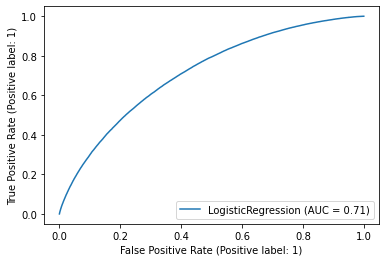

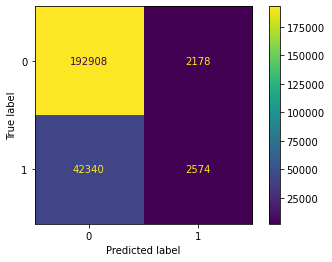

In [33]:
linear_reg_model(X_train, y_train)

In [34]:
# Model2: Random Forest

def rforest_model(X_train, y_train):
    
    rforest = RandomForestClassifier(n_estimators=100, random_state=0)
    rforest.fit(X_train, y_train)
    rforest_predict = rforest.predict(X_test)
    
# Metrics of Random Forest Classifier

    MeanAbErr_rf = mean_absolute_error(y_test, rforest_predict)
    roc_auc_score_rf = roc_auc_score(y_test, rforest_predict)
    confusion_matrix_rf = confusion_matrix(y_test, rforest_predict)
    
    print('Random Forest: ', roc_auc_score_rf)
    print('Mean Absolute Error: ', MeanAbErr_rf)
    
# And visualization
    
    RocCurveDisplay.from_estimator(rforest, X_train, y_train), ConfusionMatrixDisplay(confusion_matrix_rf).plot()

Random Forest:  0.5195067286691278
Mean Absolute Error:  0.18450416666666666


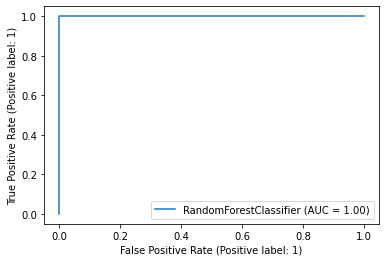

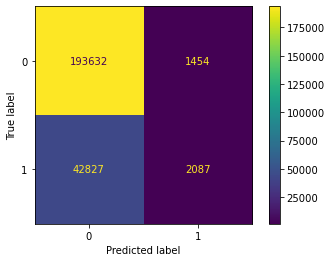

In [35]:
rforest_model(X_train, y_train)

In [36]:
# Model3: XGBoost

def XGB_model(X_train, y_train):
    
    xboost = XGB.XGBClassifier(n_estimators = 100, random_state = 42)
    xboost.fit(X_train, y_train)
    xboost_predict = xboost.predict(X_test)
    
# Metrics of XGBoost
    
    MeanAbErr_xboost = mean_absolute_error(y_test, xboost_predict)
    roc_auc_score_xboost = roc_auc_score(y_test, xboost_predict)
    confusion_matrix_xboost = confusion_matrix(y_test, xboost_predict)
    
    print('XGBoost: ', roc_auc_score_xboost)
    print('Mean Absolute Error: ', MeanAbErr_xboost)
    
# And visualization    
    
    RocCurveDisplay.from_estimator(xboost, X_train, y_train), ConfusionMatrixDisplay(confusion_matrix_xboost).plot()

XGBoost:  0.5631631877238261
Mean Absolute Error:  0.17973333333333333


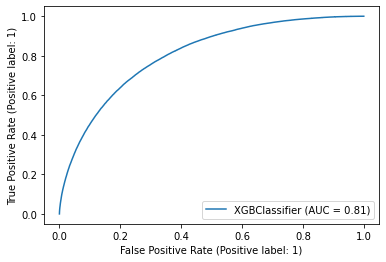

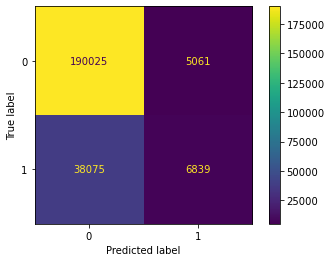

In [37]:
XGB_model(X_train, y_train)

In [38]:
scores = [['Logistic Regression', 0.5230, 0.1854], ['Random Forest', 0.5195, 0.1845], 
       ['XGBoost', 0.5631, 0.1797]] 
      
df_comp = pd.DataFrame(scores, columns =['Model', 'Roc Curve', 'Mean Absolute Error'],
                                           dtype = float) 
print(df_comp)

                 Model  Roc Curve  Mean Absolute Error
0  Logistic Regression     0.5230               0.1854
1        Random Forest     0.5195               0.1845
2              XGBoost     0.5631               0.1797


In [39]:
for x in test.columns:
    if test[x].dtypes == object:
        test[x]= label.fit_transform(test[x].astype(str))

In [40]:
test.dtypes

bin_0    float64
bin_1    float64
bin_2    float64
bin_3      int32
bin_4      int32
nom_0      int32
nom_1      int32
nom_2      int32
nom_3      int32
nom_4      int32
nom_5      int32
nom_6      int32
nom_7      int32
nom_8      int32
nom_9      int32
ord_0    float64
ord_1      int32
ord_2      int32
ord_3      int32
ord_4      int32
ord_5      int32
day      float64
month    float64
dtype: object

In [41]:
# Choose the best model and apply

xboost = XGB.XGBClassifier(n_estimators = 100, random_state = 42)
xboost.fit(X_train, y_train)
xboost_predict = xboost.predict(test)

In [42]:
xboost_predict.shape

(400000,)

In [43]:
# Creating an output

submission = pd.read_csv('sample_submission.csv', index_col='id')
submission_final = pd.DataFrame({"id": test.index, "target": xboost_predict})
submission_final.to_csv('Submission.csv', index=False)